In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split



In [2]:
df = pd.read_excel('group_experiment.xlsx')

X_input = df.iloc[:,0:7]
print(X_input)
#scaler = MinMaxScaler()
#X_input = scaler.fit_transform(X_input)
#X_input = pd.DataFrame(X_input)
#X_input = pd.concat([X_input,df['label']],axis=1)
#print(X_input)
#X_input = X_input.iloc[:,0:7]




        x1    x2      x3    x4        x5        y  label
0      800   0.0  0.3048  71.3  0.002663  126.201      1
1     1000   0.0  0.3048  71.3  0.002663  125.201      1
2     1250   0.0  0.3048  71.3  0.002663  125.951      1
3     1600   0.0  0.3048  71.3  0.002663  127.591      1
4     2000   0.0  0.3048  71.3  0.002663  127.461      1
...    ...   ...     ...   ...       ...      ...    ...
1498  2500  15.6  0.1016  39.6  0.052849  110.264    105
1499  3150  15.6  0.1016  39.6  0.052849  109.254    105
1500  4000  15.6  0.1016  39.6  0.052849  106.604    105
1501  5000  15.6  0.1016  39.6  0.052849  106.224    105
1502  6300  15.6  0.1016  39.6  0.052849  104.204    105

[1503 rows x 7 columns]


In [3]:

list1 = [[0, 14], [14, 29], [29, 48], [48, 66], [66, 80], [80, 97], [97, 112], [112, 127], [127, 142], [142, 156], 
         [156, 174], [174, 201], [201, 215], [215, 229], [229, 243], [243, 258], [258, 271], [271, 285], [285, 299], 
         [299, 316], [316, 330], [330, 345], [345, 360], [360, 375], [375, 390], [390, 406], [406, 422], [422, 438], 
         [438, 454], [454, 468], [468, 484], [484, 498], [498, 511], [511, 526], [526, 541], [542, 554], [554, 568], 
         [568, 582], [582, 596], [596, 612], [612, 629], [629, 645], [645, 661], [661, 677], [677, 693], [693, 709], 
         [709, 725], [725, 738], [738, 751], [751, 764], [764, 777], [777, 787], [787, 798], [798, 807], [807, 819], 
         [819, 830], [830, 841], [841, 855], [855, 869], [869, 886], [886, 902], [902, 918], [918, 934], [934, 948], 
         [948, 962], [962, 972], [972, 983], [983, 994], [994, 1007], [1007, 1018], [1018, 1030], [1030, 1044], [1044, 1057], 
         [1057, 1067], [1067, 1081], [1081, 1097], [1097, 1113], [1113, 1130], [1130, 1147], [1147, 1164], [1164, 1180], [1180, 1195],
         [1195, 1210], [1210, 1225], [1225, 1240], [1240, 1254], [1254, 1268], [1268, 1281], [1281, 1294], [1294, 1306], [1306, 1319], 
         [1319, 1332], [1332, 1344], [1344, 1352], [1351, 1360], [1360, 1368], [1368, 1377], [1377, 1393], [1393, 1409], [1409, 1425], 
         [1425, 1441], [1441, 1457], [1457, 1473], [1473, 1487], [1487, 1503]]

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


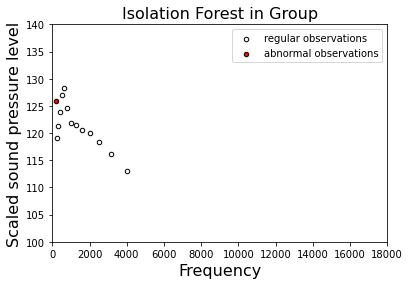

ValueError: cannot reshape array of size 2 into shape (105,2)

In [9]:
n = 0
X_select= []
X_abandon= []
num= []
m = 0
clf = IsolationForest(max_samples=128,contamination=0.01)
ex=X_input.iloc[934:948,0:5]
#训练分类器
clf.fit(ex)
#计算异常分数
#score = clf.score_samples(X_input)

# 输出decision_function的结果：大于0表示正样本的可信度大于负样本，否则可信度小于负样本。

scores = clf.decision_function(ex)
#print(scores)

X_inliner= []
X_outliner= []

scores_num = 0
X_train_size= ex.shape[0]-1

while scores_num <= X_train_size:
    if scores[scores_num] >= 0.02:
        X_inliner.append([X_input.iloc[scores_num+935,0], X_input.iloc[scores_num+935,5]])
        X_select.append(X_input.iloc[scores_num+935,:])

    else:
        n += 1
        X_outliner.append([X_input.iloc[scores_num+935,0], X_input.iloc[scores_num+935,5]])
        X_abandon.append(X_input.iloc[scores_num+935,:])

    scores_num = scores_num + 1



X_inliner = np.array(X_inliner)
X_outliner = np.array(X_outliner)
out = len(X_outliner)
df1 = pd.DataFrame({'group number': [m], 'outliner number': [out]})
num.append(df1)
#print (X_inliner)
#print (X_outliner)
plt.title("Isolation Forest in Group",size=16)
#plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)

a = plt.scatter(X_inliner[:, 0], X_inliner[:, 1], c='white',
                 s=20, edgecolor='k')

b = plt.scatter(X_outliner[:, 0], X_outliner[:, 1], c='red',s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((0, 18000))
plt.ylim((100, 140))
plt.legend([a, b],["regular observations", "abnormal observations"],loc="upper right")

plt.xlabel("Frequency",size=16)
plt.ylabel("Scaled sound pressure level",size=16)
#X_inliner.iloc[:,1].plt.scatter(figsize=(12,6))
#X_outliner.iloc[:,1].plt.scatter(figsize=(12,6))
plt.show()
    
X_select = pd.DataFrame(X_select)
X_abandon = pd.DataFrame(X_abandon)
num = np.array(num)
num = num.reshape((105, 2))
num = pd.DataFrame(num)
print('the number of outliner is :',n)


print(X_select)
print(X_abandon)
print(num)

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


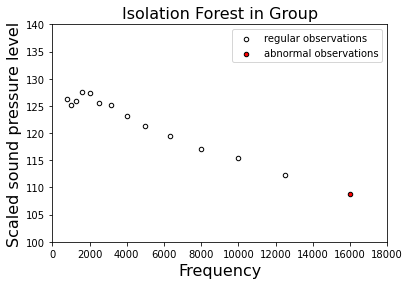

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (15). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


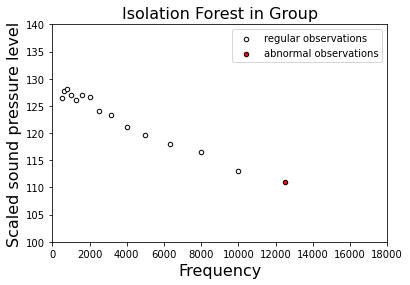

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (19). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


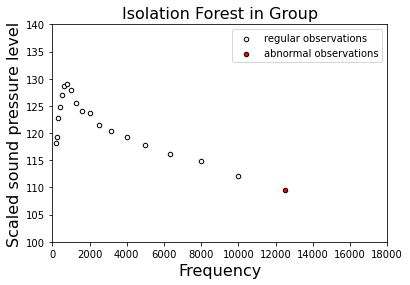

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (18). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


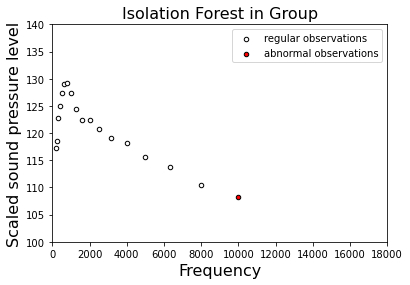

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


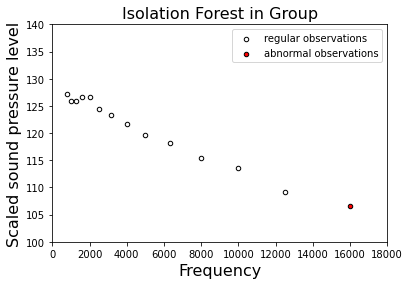

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (17). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


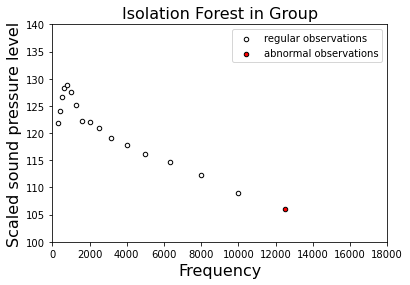

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (15). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


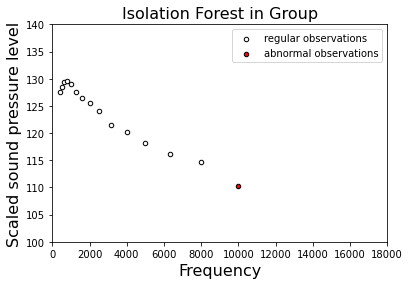

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (15). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


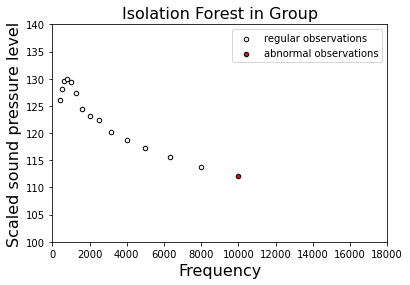

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (15). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


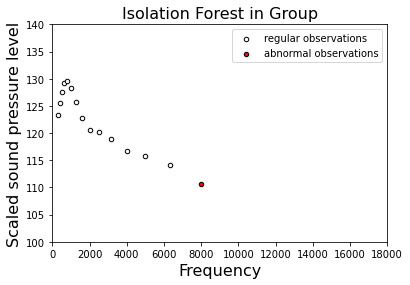

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


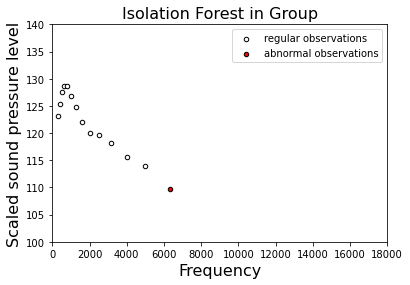

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (18). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


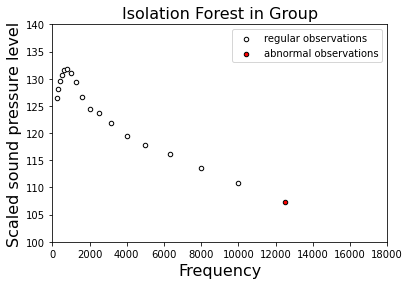

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (27). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


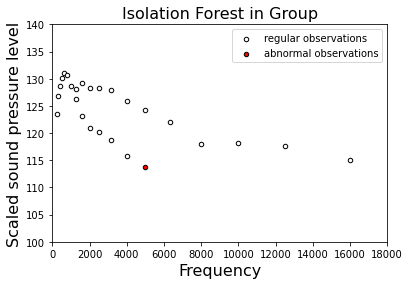

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


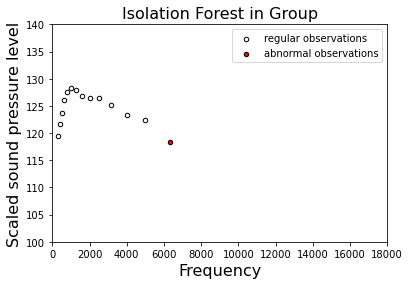

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


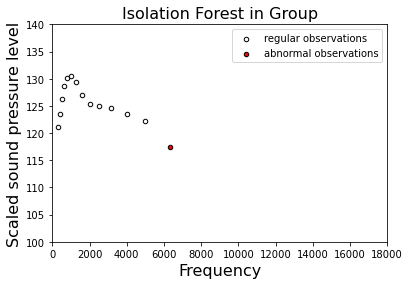

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


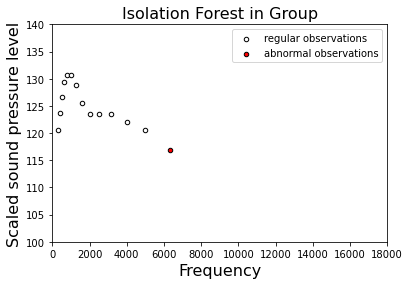

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (15). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


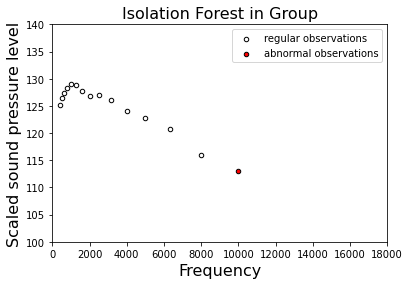

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (13). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


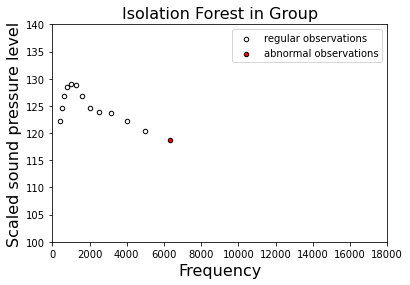

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


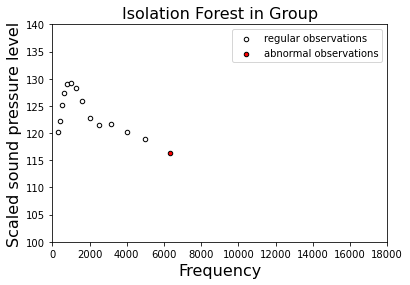

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


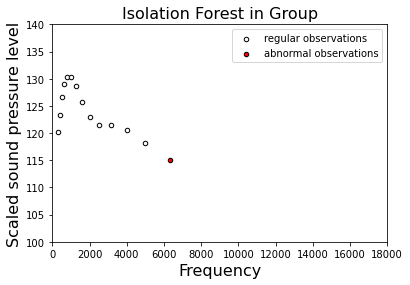

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (17). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


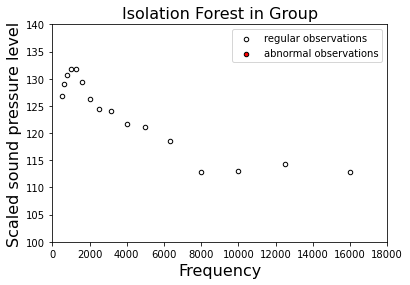

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


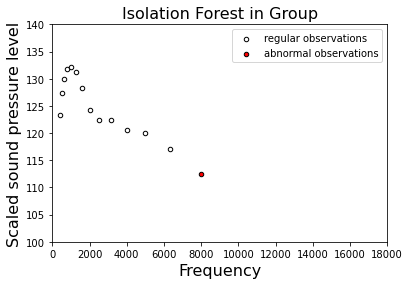

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (15). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


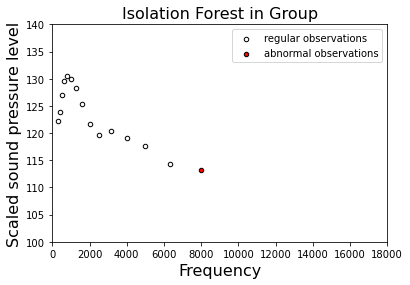

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (15). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


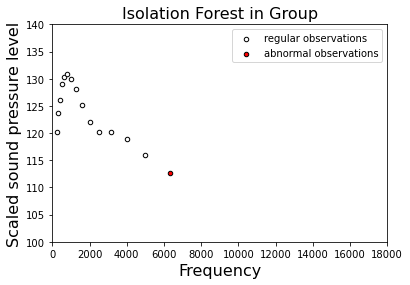

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (15). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


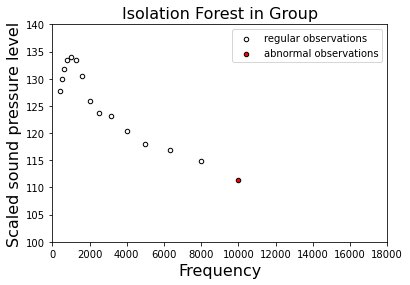

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (15). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


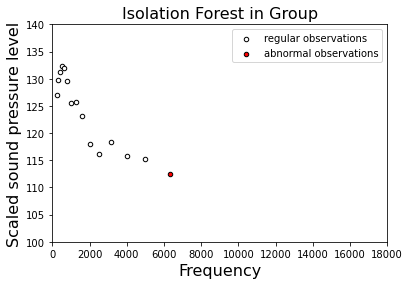

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


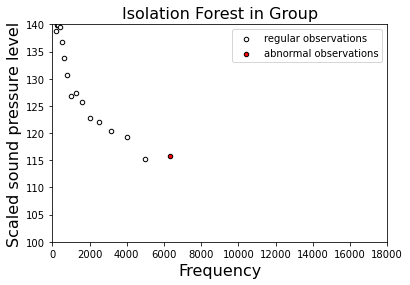

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


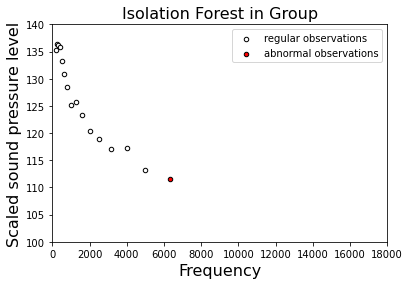

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


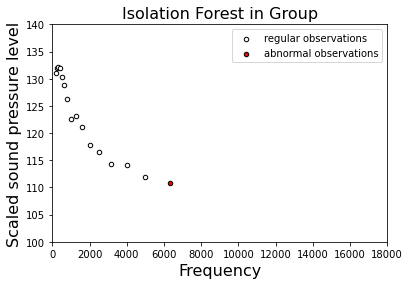

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


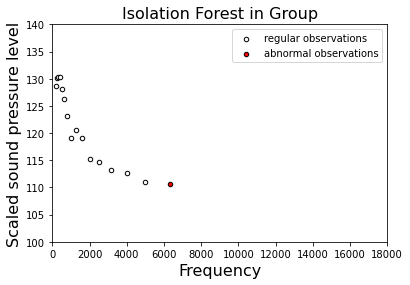

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


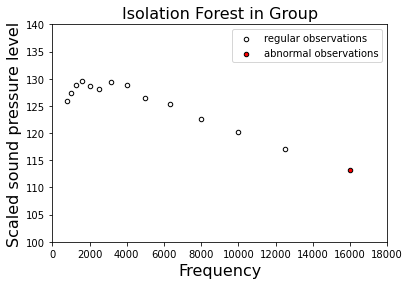

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


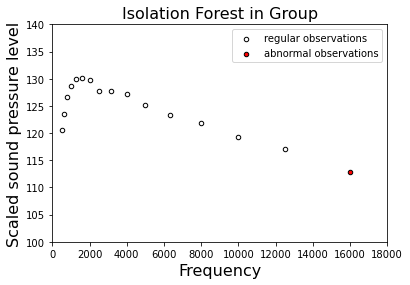

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


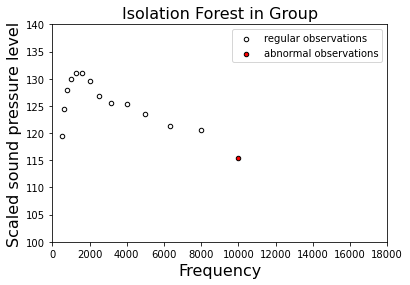

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (13). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


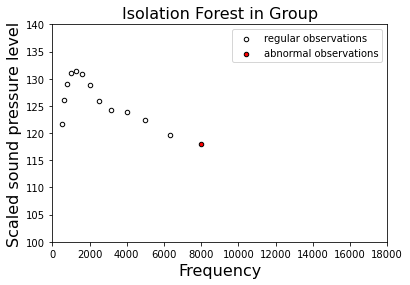

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (15). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


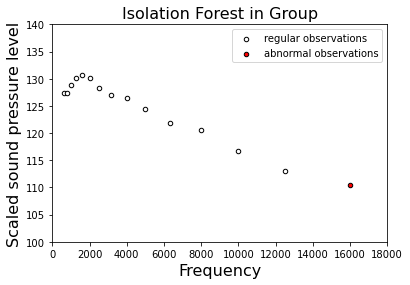

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (15). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


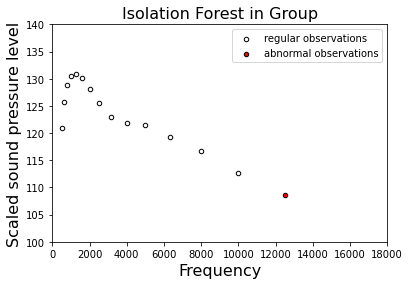

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (12). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


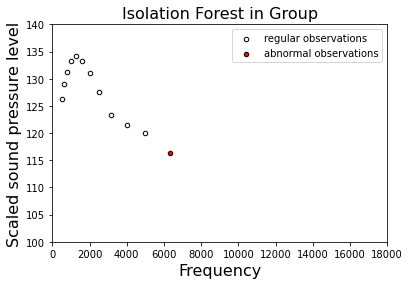

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


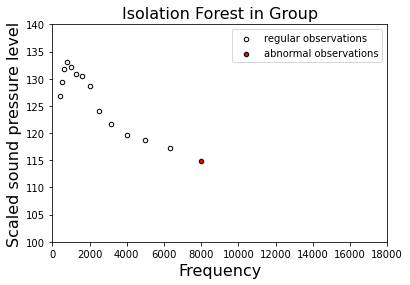

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


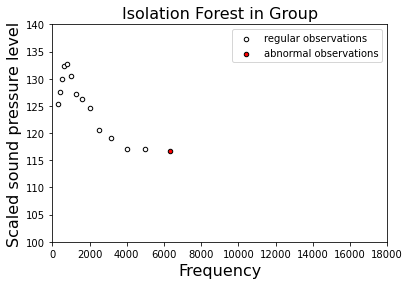

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


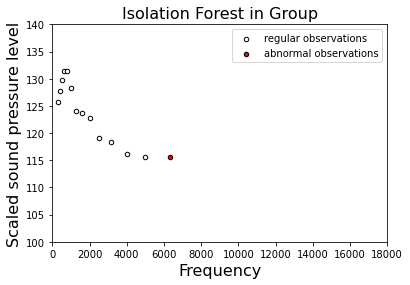

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


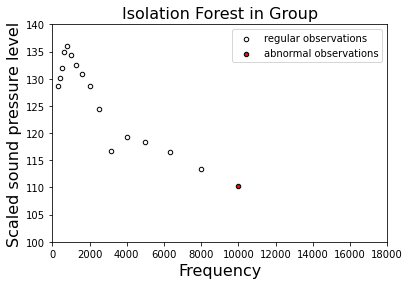

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (17). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


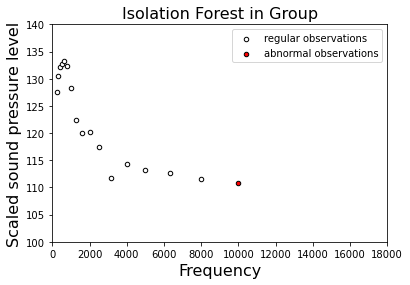

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


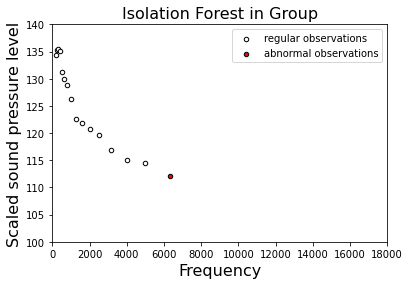

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


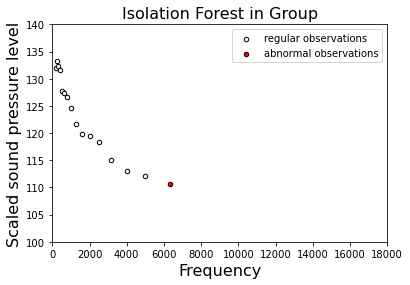

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


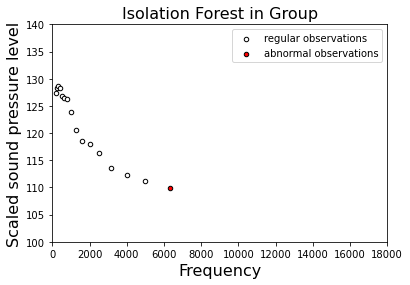

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


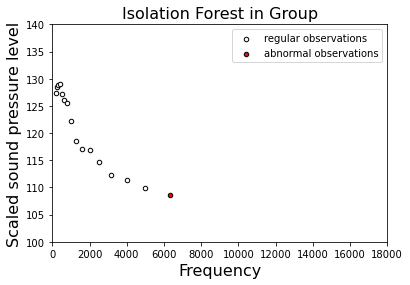

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


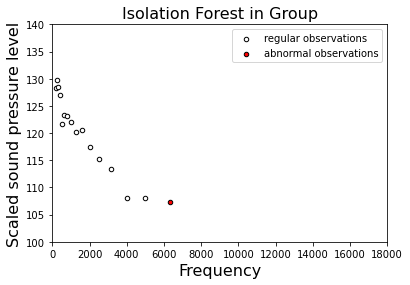

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


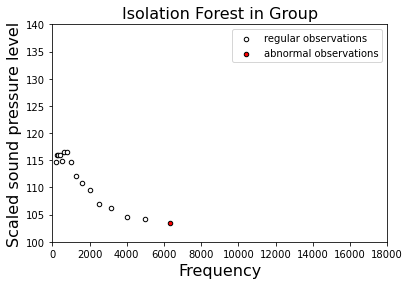

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (13). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


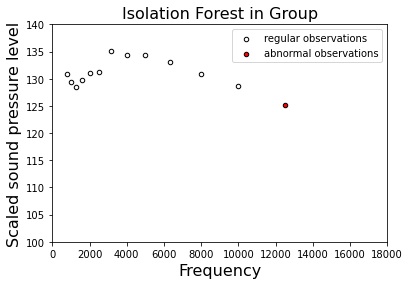

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (13). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


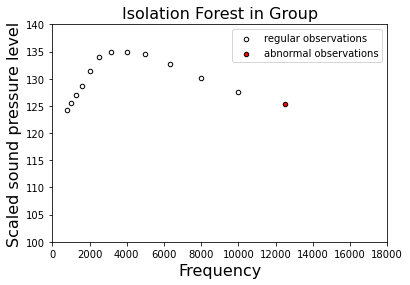

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (13). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


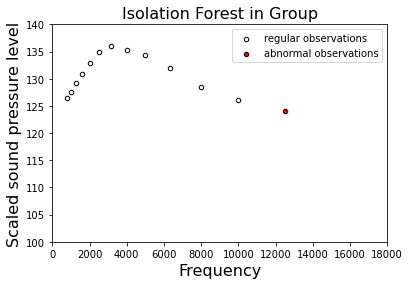

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (13). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


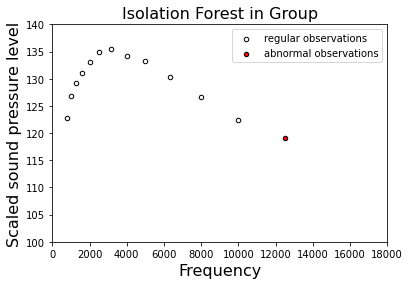

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (10). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


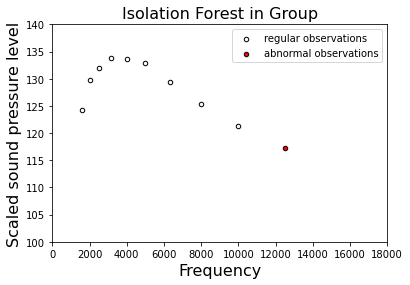

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (11). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


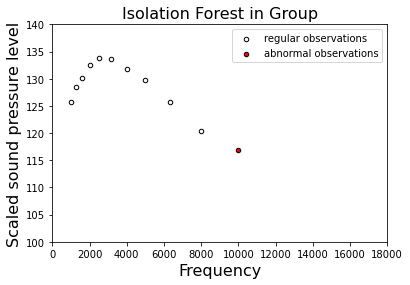

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (9). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


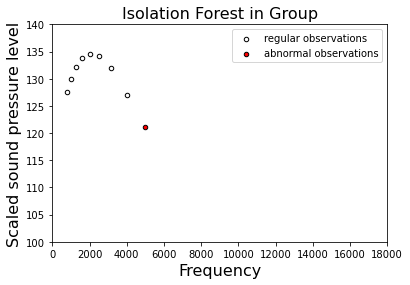

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (12). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


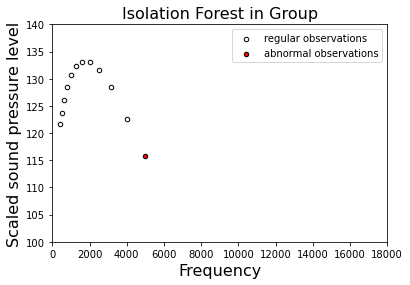

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (11). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


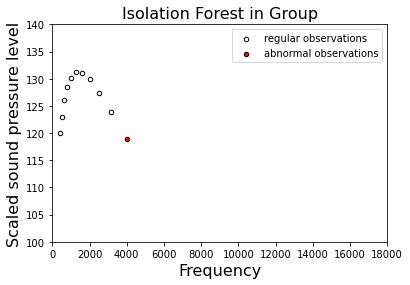

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (11). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


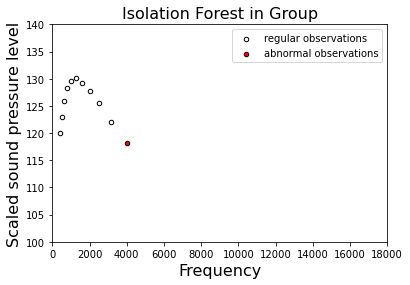

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


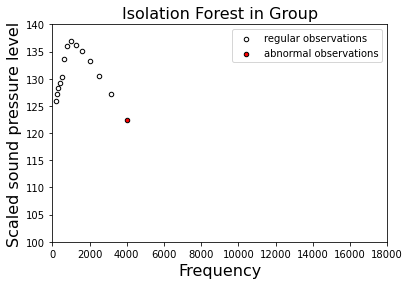

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


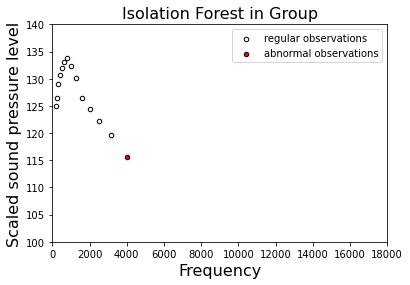

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (17). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


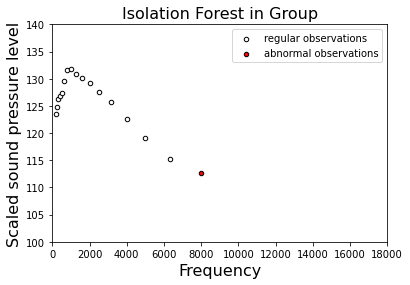

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


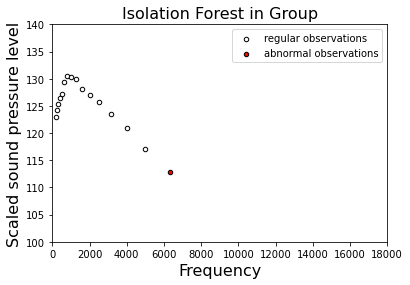

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


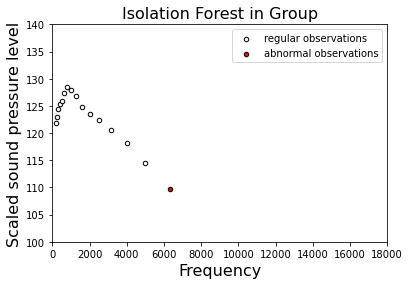

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


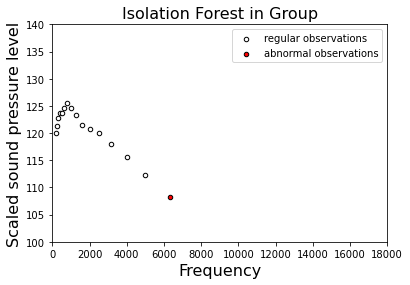

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


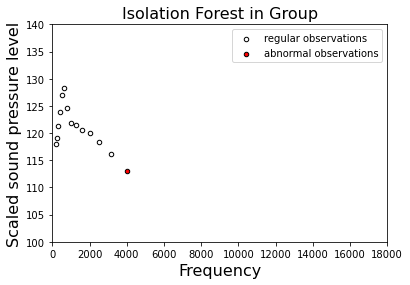

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


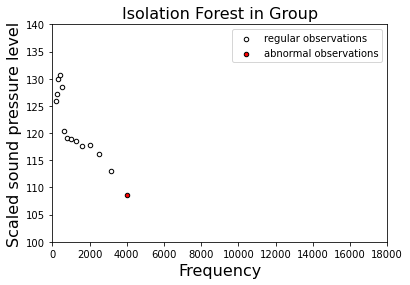

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (10). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


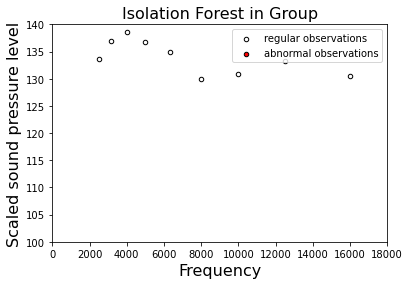

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (11). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


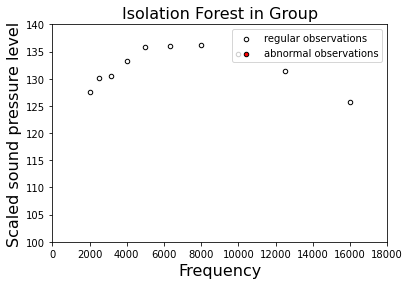

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (11). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


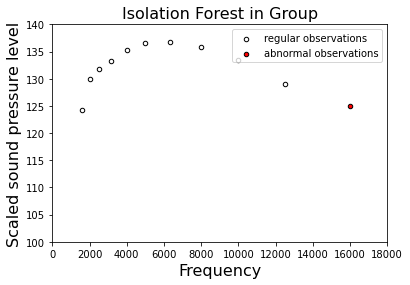

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (13). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


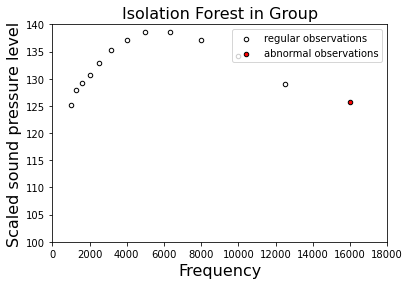

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (11). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


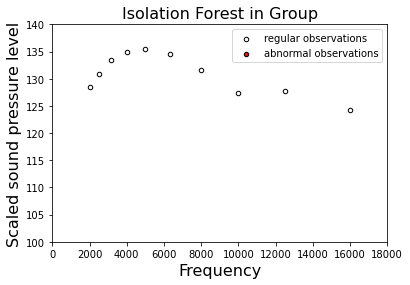

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (12). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


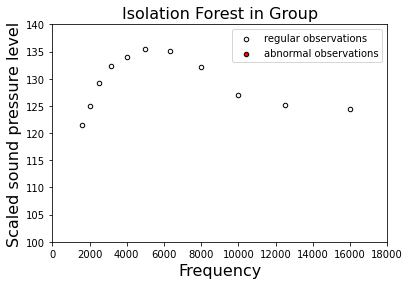

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


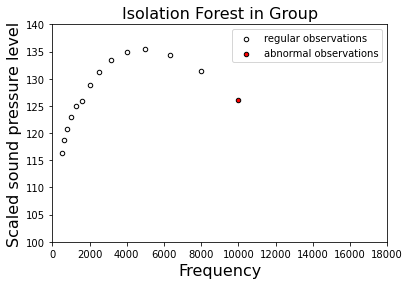

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (13). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


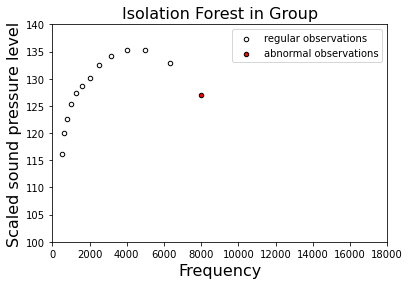

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (10). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


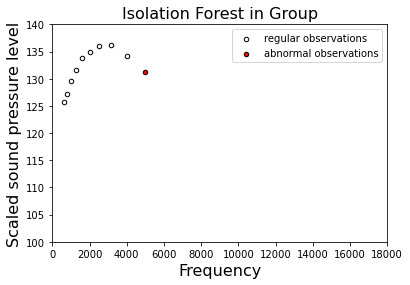

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


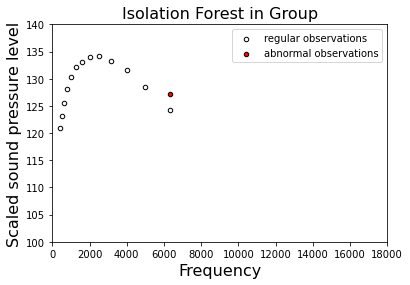

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


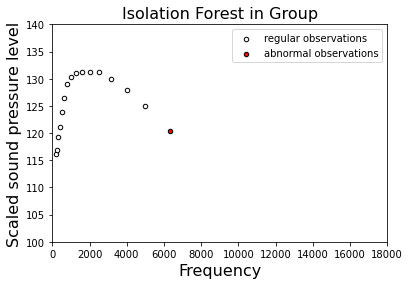

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


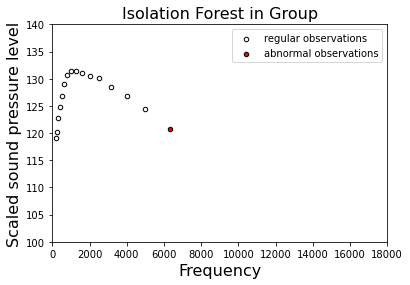

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (17). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


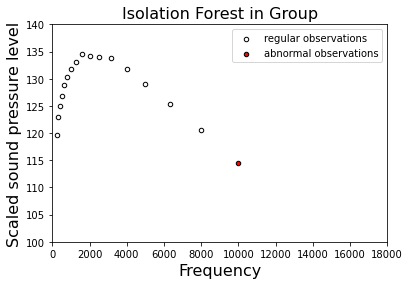

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (17). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


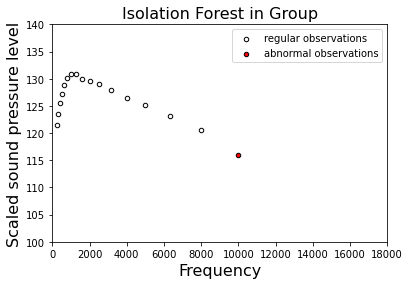

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (17). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


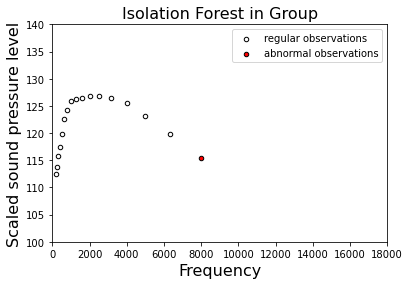

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


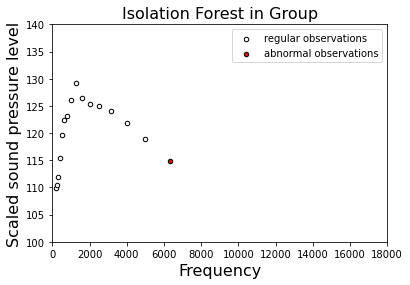

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (15). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


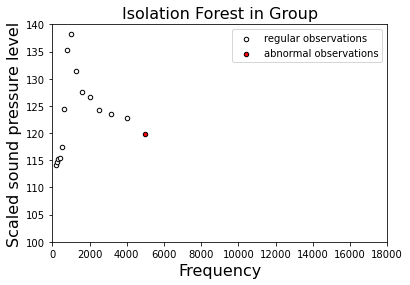

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (15). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


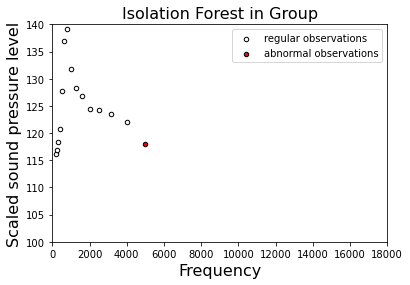

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (15). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


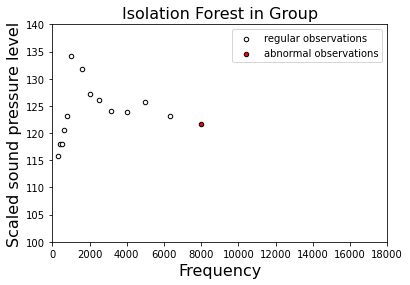

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (15). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


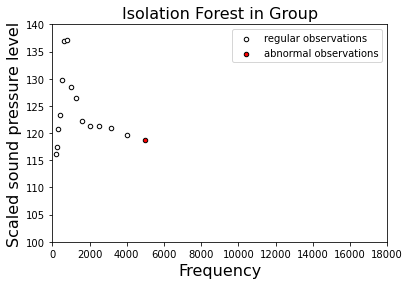

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


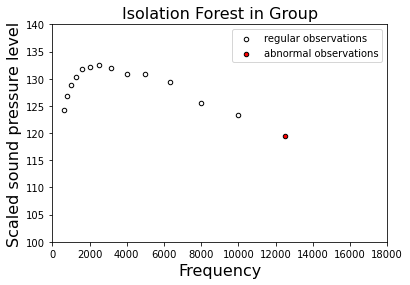

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


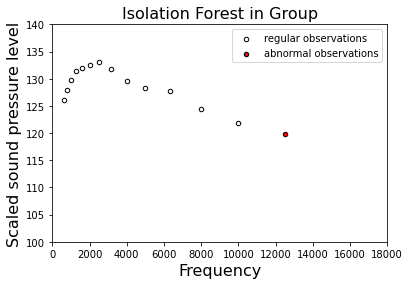

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (13). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


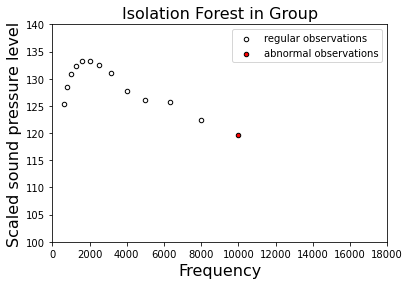

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (13). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


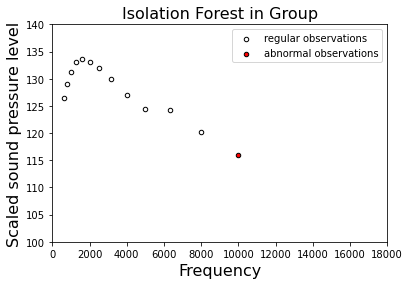

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (12). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


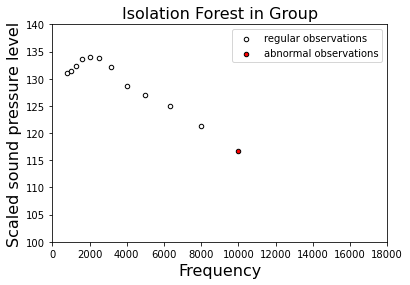

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (13). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


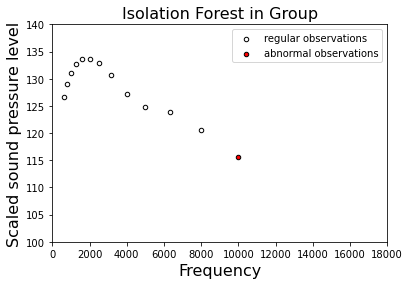

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (13). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


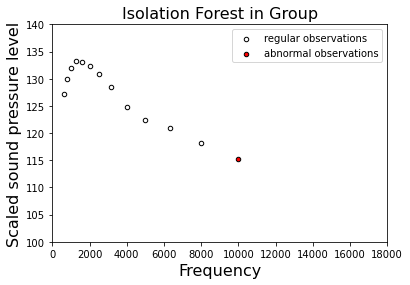

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (12). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


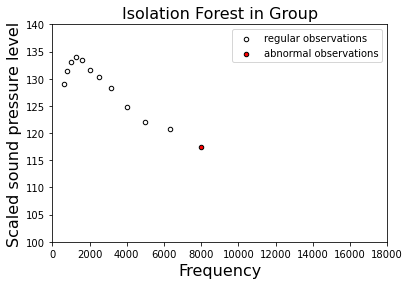

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (8). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


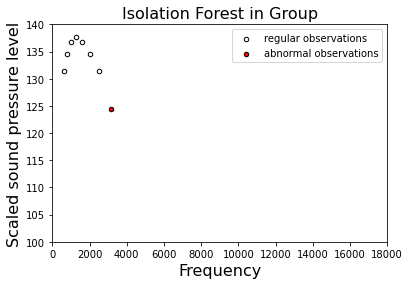

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (9). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


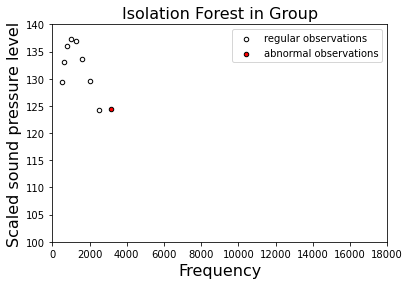

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (8). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


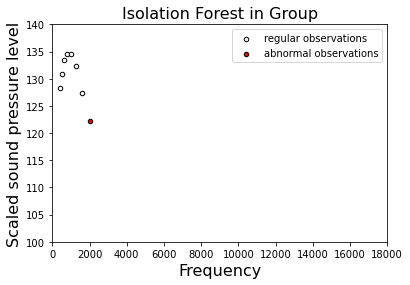

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (9). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


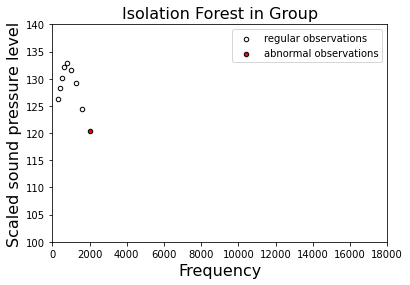

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


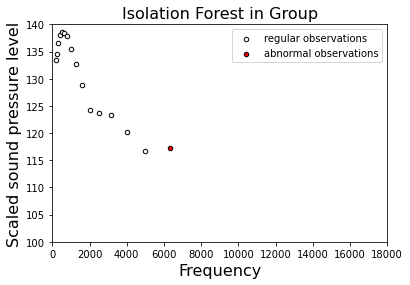

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


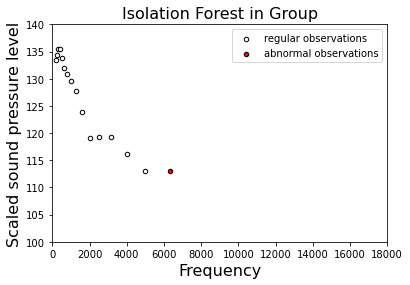

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


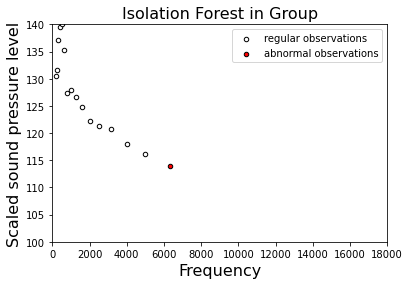

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


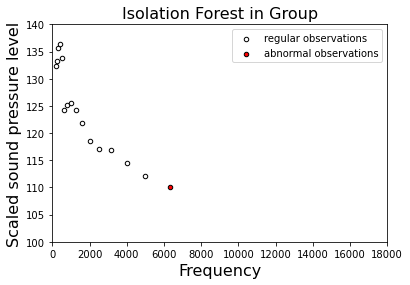

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


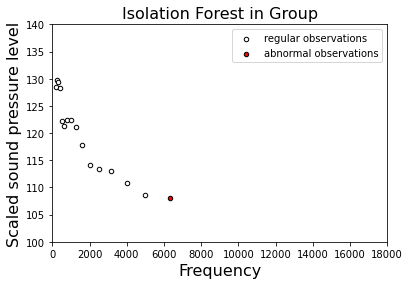

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


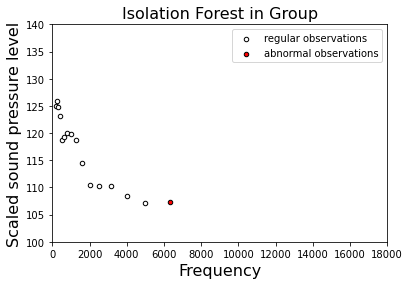

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (14). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


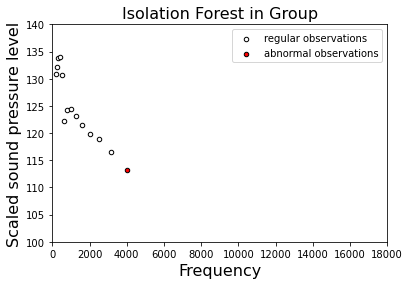

/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (128) is greater than the total number of samples (16). max_samples will be set to n_samples for estimation.
  warn(
/Users/dongwenyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


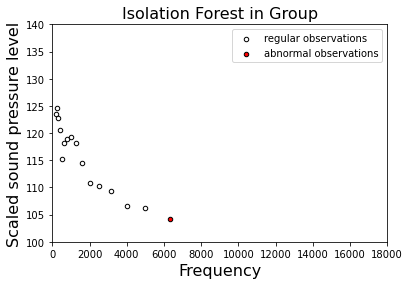

the number of outliner is : 106
          x1    x2      x3    x4        x5        y  label
0      800.0   0.0  0.3048  71.3  0.002663  126.201    1.0
1     1000.0   0.0  0.3048  71.3  0.002663  125.201    1.0
2     1250.0   0.0  0.3048  71.3  0.002663  125.951    1.0
3     1600.0   0.0  0.3048  71.3  0.002663  127.591    1.0
4     2000.0   0.0  0.3048  71.3  0.002663  127.461    1.0
...      ...   ...     ...   ...       ...      ...    ...
1497  2000.0  15.6  0.1016  39.6  0.052849  110.894  105.0
1498  2500.0  15.6  0.1016  39.6  0.052849  110.264  105.0
1499  3150.0  15.6  0.1016  39.6  0.052849  109.254  105.0
1500  4000.0  15.6  0.1016  39.6  0.052849  106.604  105.0
1501  5000.0  15.6  0.1016  39.6  0.052849  106.224  105.0

[1397 rows x 7 columns]
           x1    x2      x3    x4        x5        y  label
13    16000.0   0.0  0.3048  71.3  0.002663  108.721    1.0
28    12500.0   0.0  0.3048  55.5  0.002831  111.076    2.0
47    12500.0   0.0  0.3048  39.6  0.003101  109.619   

In [7]:
n = 0
X_select= []
X_abandon= []
num= []
m = 0

for i in list1:
    m += 1
    clf = IsolationForest(max_samples=128,contamination=0.01)
#训练分类器
   
    ex=X_input.iloc[i[0]:i[1],0:5]
    clf.fit(ex)
#计算异常分数
#score = clf.score_samples(X_input)

# 输出decision_function的结果：大于0表示正样本的可信度大于负样本，否则可信度小于负样本。

    scores = clf.decision_function(ex)
#print(scores)

    X_inliner= []
    X_outliner= []

    scores_num = 0
    X_train_size= ex.shape[0]-1

    while scores_num <= X_train_size:
        if scores[scores_num] >= 0.02:
            X_inliner.append([X_input.iloc[scores_num+i[0],0], X_input.iloc[scores_num+i[0],5]])
            X_select.append(X_input.iloc[scores_num+i[0],:])

        else:
            n += 1
            X_outliner.append([X_input.iloc[scores_num+i[0],0], X_input.iloc[scores_num+i[0],5]])
            X_abandon.append(X_input.iloc[scores_num+i[0],:])

        scores_num = scores_num + 1



    X_inliner = np.array(X_inliner)
    X_outliner = np.array(X_outliner)
    out = len(X_outliner)
    df1 = pd.DataFrame({'group number': [m], 'outliner number': [out]})
    num.append(df1)
#print (X_inliner)
#print (X_outliner)
    plt.title("Isolation Forest in Group",size=16)
#plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)

    a = plt.scatter(X_inliner[:, 0], X_inliner[:, 1], c='white',
                 s=20, edgecolor='k')

    b = plt.scatter(X_outliner[:, 0], X_outliner[:, 1], c='red',s=20, edgecolor='k')

    plt.axis('tight')
    plt.xlim((0, 18000))
    plt.ylim((100, 140))
    plt.legend([a, b],["regular observations", "abnormal observations"],loc="upper right")

    plt.xlabel("Frequency",size=16)
    plt.ylabel("Scaled sound pressure level",size=16)
#X_inliner.iloc[:,1].plt.scatter(figsize=(12,6))
#X_outliner.iloc[:,1].plt.scatter(figsize=(12,6))
    plt.show()
    
X_select = pd.DataFrame(X_select)
X_abandon = pd.DataFrame(X_abandon)
num = np.array(num)
num = num.reshape((105, 2))
num = pd.DataFrame(num)
print('the number of outliner is :',n)


print(X_select)
print(X_abandon)
print(num)


In [6]:
# set up Excel File
writer = pd.ExcelWriter('dataset.xlsx', engine='xlsxwriter')

X_select.to_excel(writer, sheet_name='inliner', index=False)

X_abandon.to_excel(writer, sheet_name='outliner', index=False)

num.to_excel(writer, sheet_name='out_number ', index=False)
# close Excel File
writer.save()
